In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import xgboost as xgb


In [2]:
# fix seed

def seed_everything(seed=0):
    #random.seed(seed)
    #os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

SEED = 42
seed_everything(SEED)

In [3]:
df_train = pd.read_csv("train.csv", index_col='id')
df_origin = pd.read_csv("credit_risk_dataset.csv")
df_merged = pd.concat([df_train, df_origin])

In [4]:
df_merged.dropna(inplace=True)

roc_auc_score (XGBoost): 0.8678709368262365
roc_auc_score (XGBoost): 0.9559369658572647
f1-score (XGBoost): 0.8299755225004707
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     14504
           1       0.93      0.75      0.83      2953

    accuracy                           0.95     17457
   macro avg       0.94      0.87      0.90     17457
weighted avg       0.95      0.95      0.95     17457



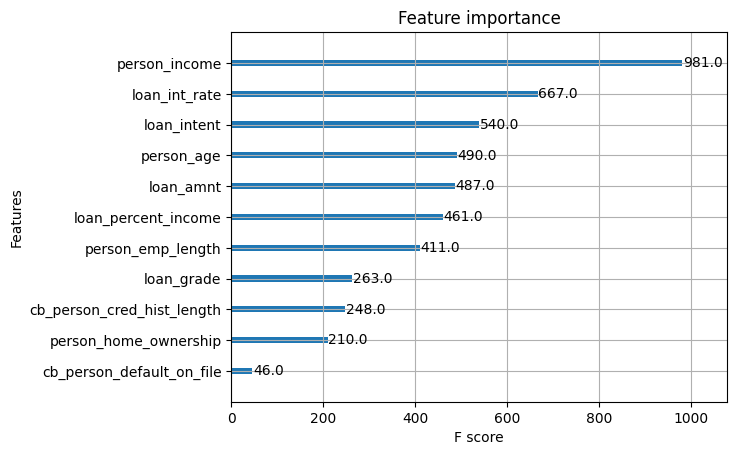

In [6]:
#정규화 X 범주형 데이터 변환 X
df = df_merged

# 범주형 변수를 'category' 타입으로 변환
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
df[categorical_features] = df[categorical_features].astype('category')

# XGBoost 모델 훈련 시 enable_categorical=True 설정
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

xgb_model = xgb.XGBClassifier(eval_metric='logloss' , enable_categorical=True, random_state=SEED)
xgb_model.fit(X_train, y_train)

# 예측 및 평가
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:,1]
print("roc_auc_score (XGBoost):", roc_auc_score(y_test, y_pred))
print("roc_auc_score (XGBoost):", roc_auc_score(y_test, y_pred_proba))
print("f1-score (XGBoost):", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# 특성 중요도 시각화
xgb.plot_importance(xgb_model)
plt.show()

In [12]:
# 범주형 처리 추가 / 정규화 O
df_encoded = df_merged
df_encoded['cb_person_default_on_file'] = df_encoded['cb_person_default_on_file'] == 'Y'
df_encoded = pd.get_dummies(df_merged, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])

X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = xgb.XGBClassifier(eval_metric='logloss' , enable_categorical=True, random_state=SEED)
xgb_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = xgb_model.predict(X_test_scaled)
y_pred_proba = xgb_model.predict_proba(X_test_scaled)[:,1]
print("roc_auc_score (XGBoost):", roc_auc_score(y_test, y_pred))
print("roc_auc_score (XGBoost):", roc_auc_score(y_test, y_pred_proba))
print("f1-score (XGBoost):", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

roc_auc_score (XGBoost): 0.8633996875857453
roc_auc_score (XGBoost): 0.9564028391854815
f1-score (XGBoost): 0.8239076981274825
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     14504
           1       0.93      0.74      0.82      2953

    accuracy                           0.95     17457
   macro avg       0.94      0.86      0.90     17457
weighted avg       0.95      0.95      0.94     17457



loan_status
0    23200
1    11600
Name: count, dtype: int64
roc_auc_score (XGBoost): 0.8818865713609557
roc_auc_score (XGBoost): 0.9549886071341251
f1-score (XGBoost): 0.8119937963122523
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     14504
           1       0.83      0.80      0.81      2953

    accuracy                           0.94     17457
   macro avg       0.89      0.88      0.89     17457
weighted avg       0.94      0.94      0.94     17457



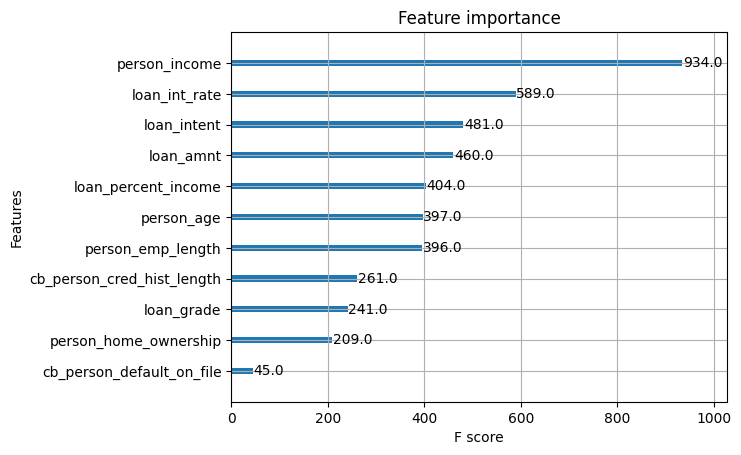

In [8]:
#정규화 X 범주형 데이터 변환 X
df = df_merged

# 범주형 변수를 'category' 타입으로 변환
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
df[categorical_features] = df[categorical_features].astype('category')

# XGBoost 모델 훈련 시 enable_categorical=True 설정
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)

X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

print(y_resampled.value_counts())

xgb_model = xgb.XGBClassifier(eval_metric='logloss' , enable_categorical=True, random_state=SEED)
xgb_model.fit(X_resampled, y_resampled)

# 예측 및 평가
y_pred = xgb_model.predict(X_test)
print("roc_auc_score (XGBoost):", roc_auc_score(y_test, y_pred))
print("roc_auc_score (XGBoost):", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]))
print("f1-score (XGBoost):", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# 특성 중요도 시각화
xgb.plot_importance(xgb_model)
plt.show()

roc_auc_score (XGBoost): 0.8837449047767852
roc_auc_score (XGBoost): 0.9550374627203275
f1-score (XGBoost): 0.802887844190732
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     14504
           1       0.80      0.81      0.80      2953

    accuracy                           0.93     17457
   macro avg       0.88      0.88      0.88     17457
weighted avg       0.93      0.93      0.93     17457



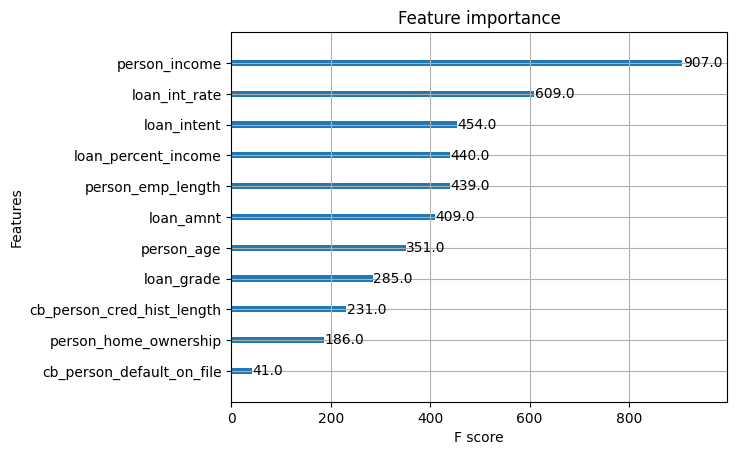

In [11]:
#정규화 X 범주형 데이터 변환 X
df = df_merged

# 범주형 변수를 'category' 타입으로 변환
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
df[categorical_features] = df[categorical_features].astype('category')

# XGBoost 모델 훈련 시 enable_categorical=True 설정
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

from imblearn.over_sampling import SMOTENC
smotenc = SMOTENC(categorical_features=categorical_features, random_state=SEED)
X_resampled, y_resampled = smotenc.fit_resample(X_resampled, y_resampled)

xgb_model = xgb.XGBClassifier(eval_metric='logloss' , enable_categorical=True, random_state=SEED)
xgb_model.fit(X_resampled, y_resampled)

# 예측 및 평가
y_pred = xgb_model.predict(X_test)
print("roc_auc_score (XGBoost):", roc_auc_score(y_test, y_pred))
print("roc_auc_score (XGBoost):", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]))
print("f1-score (XGBoost):", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# 특성 중요도 시각화
xgb.plot_importance(xgb_model)
plt.show()

roc_auc_score (XGBoost): 0.8693652990433505
roc_auc_score (XGBoost): 0.9522462035765697
f1-score (XGBoost): 0.8205693296602388
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14504
           1       0.90      0.76      0.82      2953

    accuracy                           0.94     17457
   macro avg       0.92      0.87      0.89     17457
weighted avg       0.94      0.94      0.94     17457



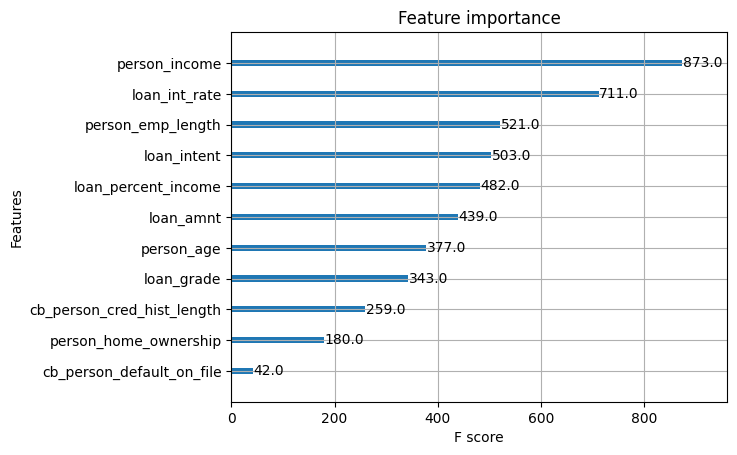

In [10]:
#정규화 X 범주형 데이터 변환 X
df = df_merged

# 범주형 변수를 'category' 타입으로 변환
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
df[categorical_features] = df[categorical_features].astype('category')

# XGBoost 모델 훈련 시 enable_categorical=True 설정
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

from imblearn.over_sampling import SMOTENC
smotenc = SMOTENC(categorical_features=categorical_features, random_state=SEED)
X_resampled, y_resampled = smotenc.fit_resample(X_train, y_train)

xgb_model = xgb.XGBClassifier(eval_metric='logloss' , enable_categorical=True, random_state=SEED)
xgb_model.fit(X_resampled, y_resampled)

# 예측 및 평가
y_pred = xgb_model.predict(X_test)
print("roc_auc_score (XGBoost):", roc_auc_score(y_test, y_pred))
print("roc_auc_score (XGBoost):", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]))
print("f1-score (XGBoost):", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# 특성 중요도 시각화
xgb.plot_importance(xgb_model)
plt.show()

Submission 제출 코드

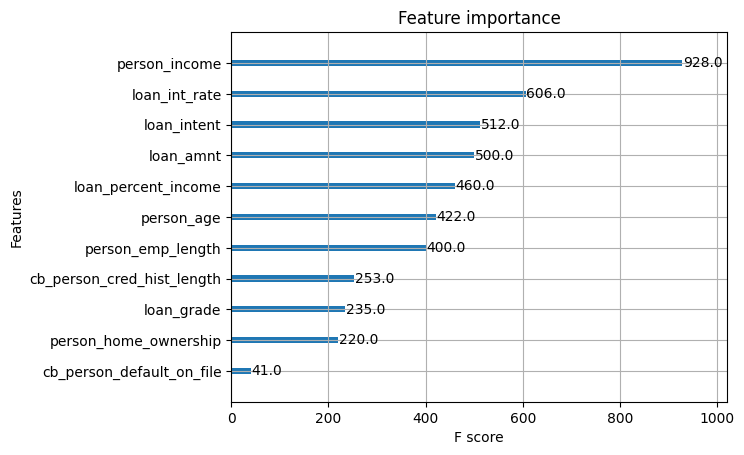

In [83]:
#정규화 X 범주형 데이터 변환 X
df = df_merged

# 범주형 변수를 'category' 타입으로 변환
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
df[categorical_features] = df[categorical_features].astype('category')

# XGBoost 모델 훈련 시 enable_categorical=True 설정
X_train = df.drop('loan_status', axis=1)
y_train = df['loan_status']

from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_train, y_train = undersampler.fit_resample(X_train, y_train)


xgb_model = xgb.XGBClassifier(eval_metric='logloss' , enable_categorical=True, random_state=SEED)
xgb_model.fit(X_train, y_train)

xgb.plot_importance(xgb_model)
plt.show()

In [85]:
submission = pd.read_csv("submission_oversampling.csv")
test = pd.read_csv("test.csv", index_col='id')

test[categorical_features] = test[categorical_features].astype('category')
test_pred = xgb_model.predict_proba(test)[:,1]

submission['loan_status'] = test_pred
submission.to_csv('submission_undersampling.csv', index=False)

In [6]:
import pickle

# 모델 저장
with open('my_model.pkl', 'wb') as f:
  pickle.dump(xgb_model, f)